<a href="https://colab.research.google.com/github/gabmarquinhos/AprendizadoMaquinas/blob/main/Reducao_Dimensionalidade_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from google.colab import drive

# O drive.mount faz com que meu notebook se conecte ao meu google drive
# permitindo eu acessar os arquivos nele presente.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt

# Fazendo a leitura da base de dados:
df = pd.read_table('/content/drive/MyDrive/IFES/12_Periodo/Aprendizado_de_Maquinas/Atividades/01_PCA/wine.data',sep = ',')
  # df = Data Frame
  # sep = ',' é o separador usado na base dados, para ver qual separador é só abrir o arquivo com o bloco de notas

# Usando os nomes das colunas conforme a especificação do site em que a base de dados se encontra:
df.columns = [ 'target', 'Alcohol','Malic acid','Ash','ashalcalinity','magnesium','totalPhenols','flavanoids','nonFlavanoidPhenols','proanthocyanins','colorIntensity','hue','od280_od315','proline']

# Definindo os atributos de acordo com o arquivo wine.names
features = ['Alcohol','Malic acid','Ash','ashalcalinity','magnesium','totalPhenols','flavanoids','nonFlavanoidPhenols','proanthocyanins','colorIntensity','hue','od280_od315','proline']

df.head()

,target,Alcohol,Malic acid,Ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [24]:
# Como visto acima não temos os nomes dos vinhos no banco acima
# A identificação deles ocorre na coluna 'target'

# Primeiro vamos converter o tipo de dados da coluna para string
datatype = {'target':'string'}
df = df.astype(datatype)

# Agora eu insiro os nomes na coluna target
df['target'] = df.apply(lambda x :"Vinho 1" if x['target'] == '1' else ("Vinho 2" if x['target']== '2' else ("Vinho 3" if x['target']== '3' else "")) ,axis=1)

# Mostrando como fica o data frame:
df.head()             

,target,Alcohol,Malic acid,Ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,Vinho 1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,Vinho 1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,Vinho 1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,Vinho 1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,Vinho 1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [25]:
# Pegando apenas os valores:
x = df.loc[:,features].values
print(x)

# Pegando apenas os nomes dos vinhos
y = df.loc[:,['target']].values


[[1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 ... 8.600e-01 3.450e+00 1.480e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [26]:
# Agora precisamos padronizar as variáveis
# Vamos começar padronizando os valores
x = StandardScaler().fit_transform(x)
print(x)

[[ 0.2558245  -0.50162433 -0.8244853  ...  0.40709978  1.13169801
   0.97105248]
 [ 0.20622873  0.01802001  1.10768971 ...  0.3195674   0.80457911
   1.40099798]
 [ 1.70650069 -0.34931478  0.48793547 ... -0.4244579   1.20281081
   2.34050852]
 ...
 [ 0.34261709  1.73822194 -0.38701171 ... -1.60614514 -1.48525319
   0.28632445]
 [ 0.21862767  0.22408586  0.01400575 ... -1.56237895 -1.39991783
   0.30224836]
 [ 1.40892609  1.57695301  1.36288264 ... -1.51861275 -1.42836295
  -0.58949046]]


In [27]:
# Agora iremos aplicar o algoritmo de PCA
# Usamo o atributo n_components = 2 pois queremos reduzir a dimensionalidade para 2
pca = PCA(n_components = 2)

# O método fit_transform ajusta o modelo com X e aplica a redução de dimensionalidade em x
PrincipalComponents = pca.fit_transform(x)
print(PrincipalComponents)


[[ 2.23024297  0.30231277]
 [ 2.53192196 -1.06225676]
 [ 3.75467731 -2.80530871]
 [ 1.0201307  -0.88838036]
 [ 3.04919938 -2.1700067 ]
 [ 2.45822831 -1.20706466]
 [ 2.06160512 -1.64048497]
 [ 2.51844454 -0.96083709]
 [ 2.76797089 -0.82452149]
 [ 3.48916135 -1.35519047]
 [ 1.76638133 -0.6467145 ]
 [ 2.12870494 -0.71042819]
 [ 3.46649467 -1.1821256 ]
 [ 4.31363172 -2.15473286]
 [ 2.30845048 -1.70092988]
 [ 2.16745547 -2.36700104]
 [ 1.90220844 -1.66778153]
 [ 3.54012997 -2.57341412]
 [ 2.09274066 -1.08886084]
 [ 3.1319081  -0.82827339]
 [ 1.10804505 -0.25248228]
 [ 2.55760384  0.06025432]
 [ 1.67255267  0.49502043]
 [ 1.78792909  0.29470798]
 [ 1.00222687 -0.95757325]
 [ 1.79246479 -0.71100388]
 [ 1.25516785  0.0619388 ]
 [ 2.20313645 -0.72205026]
 [ 2.27398683 -0.22242744]
 [ 2.51223477 -1.28306798]
 [ 2.68519586 -1.51523154]
 [ 1.64501308 -0.08373303]
 [ 1.90224111 -1.66952014]
 [ 1.42130848 -0.72585563]
 [ 1.92515877 -0.20344976]
 [ 1.39514757 -0.68329424]
 [ 1.14008674 -0.14047148]
 

In [28]:
# Com as componentes principais vamos aplicar ao data frame
PrincipalDf = pd.DataFrame(data = PrincipalComponents,columns = ['Principal Component 1','Principal Component 2'])

# Adicionando os nomes dos vinhos no novo data frame
FinalDf = pd.concat([PrincipalDf,df[['target']]],axis = 1)
print(FinalDf)


     Principal Component 1  Principal Component 2   target
0                 2.230243               0.302313  Vinho 1
1                 2.531922              -1.062257  Vinho 1
2                 3.754677              -2.805309  Vinho 1
3                 1.020131              -0.888380  Vinho 1
4                 3.049199              -2.170007  Vinho 1
..                     ...                    ...      ...
172              -3.372888              -2.185461  Vinho 3
173              -2.602155              -1.739804  Vinho 3
174              -2.692146              -2.739875  Vinho 3
175              -2.398394              -2.279929  Vinho 3
176              -3.215852              -2.740593  Vinho 3

[177 rows x 3 columns]


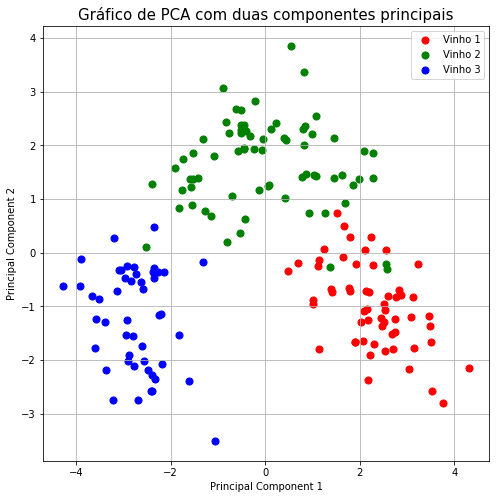

In [29]:
# Plotando os gráficos das componentes
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('Gráfico de PCA com duas componentes principais', fontsize = 15)
targets = ['Vinho 1','Vinho 2','Vinho 3'] 
colors = ['r','g','b']

# Definindo os pontos do gráfico
# Obs: A função zip retorna uma lista de tupas
# No nosso caso vai fazer [(Vinho 01,r),(Vinho 02,g),(Vinho 03,b)]
for target, color in zip(targets,colors):
  Indices = FinalDf['target'] == target
  ax.scatter(FinalDf.loc[Indices,'Principal Component 1'],
             FinalDf.loc[Indices,'Principal Component 2'],
             c = color,
             s = 50
             )

ax.legend(targets) # Adiciono as legendas na figura
ax.grid()